#### QUESTION REQUIREMENT

EDA: 
- Are there quality issues in the dataset (noisy, missing data, etc.)?
- What will you need to do to clean and/or transform the raw data for analysis?

Identify Interesting Statistics:
- Now that you have a better understanding of the data, you will want to think about ways you can compare and play with the data. You don't need to stay one-dimensional. For example, in your Week 2 Notebook, you calculated the average quality of wines based on their alcohol content. 
- What factors can you identify in your own dataset?!

Visualize Your Statistics:
- create interesting plots and graphs that clearly show the reader your comparisons and numbers
- think about why the statistic you are highlighting is important and how you can best illustrate that angle

## I. Package Import and Data Import

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
raw_data = pd.read_csv('/Users/user/Desktop/netflix_titles.csv')

## II. Data Exploration and Data Cleaning

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
raw_data.tail(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6184,80003196,TV Show,Wakfu,NaN,"Fanny Bloc, Jules De Jongh, Patrick Béthune, H...",France,"April 6, 2018",2017,TV-Y7-FV,3 Seasons,Kids' TV,"Yugo, a 12-year-old Eliatrope with special pow..."
6185,80223989,TV Show,Chilling Adventures of Sabrina,NaN,"Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...",United States,"April 5, 2019",2019,TV-14,2 Seasons,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","Magic and mischief collide as half-human, half..."
6186,70258489,TV Show,Derek,NaN,"Ricky Gervais, Kerry Godliman, Karl Pilkington...",United Kingdom,"April 5, 2019",2015,TV-14,3 Seasons,"British TV Shows, International TV Shows, TV C...",Ricky Gervais created and stars in this heartw...
6187,80161628,TV Show,Imposters,NaN,"Inbar Lavi, Rob Heaps, Parker Young, Marianne ...",United States,"April 5, 2019",2017,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, TV Com...","Supported by a team of fellow thieves, a con a..."
6188,80096545,TV Show,Roman Empire: Reign of Blood,NaN,"Sean Bean, Aaron Jakubenko, Edwin Wright, Mike...","Canada, United States","April 5, 2019",2019,TV-MA,3 Seasons,Docuseries,This stylish mix of documentary and historical...
6189,80115432,TV Show,Spirit: Riding Free,NaN,"Amber Frank, Sydney Park, Bailey Gambertoglio,...",United States,"April 5, 2019",2019,TV-Y7,8 Seasons,Kids' TV,"In a small Western town, spunky ex-city girl L..."
6190,80130911,TV Show,Chewing Gum,NaN,"Michaela Coel, John Macmillan, Robert Lonsdale...",United Kingdom,"April 4, 2017",2017,TV-MA,2 Seasons,"British TV Shows, International TV Shows, Roma...","The virginal Tracey, who was raised in a stric..."
6191,80204451,TV Show,BAKI,NaN,"Nobunaga Shimazaki, Takayuki Sugo, Bin Shimada...",Japan,"April 30, 2019",2018,TV-MA,2 Seasons,"Anime Series, International TV Shows",While martial arts champion Baki Hanma trains ...
6192,80199128,TV Show,Kim's Convenience,NaN,"Paul Sun-Hyung Lee, Jean Yoon, Andrea Bang, Si...",Canada,"April 3, 2019",2019,TV-14,3 Seasons,TV Comedies,"While running a convenience store in Toronto, ..."
6193,80049277,TV Show,Ash vs. Evil Dead,NaN,"Bruce Campbell, Lucy Lawless, Ray Santiago, Da...",United States,"April 29, 2019",2018,TV-MA,3 Seasons,"TV Action & Adventure, TV Comedies, TV Horror","Thirty years later, Ash Williams – demon hunte..."


In [6]:
raw_data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [7]:
# Data Cleaning 

In [8]:
# Inspect Missing Values 
raw_data_missing = raw_data.isnull().sum()
raw_data_missing 

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

- Since 1969/6234 of the shows do not have director information on Netflix, we will proceed to drop this column for meaning analysis subsequently 
- date_added column for this dataset is not very useful since this highly depends on administration of netflix and the partnership capabilities over time. Hence, we will proceed to drop this column as well 

In [9]:
# Fill in empty cells as "Unknown Values"
raw_data['cast'].fillna("Unknown", inplace = True) 
raw_data['country'].fillna("Unknown", inplace = True)
raw_data['rating'].fillna("Unknown", inplace = True)

In [10]:
del raw_data['director']
del raw_data['date_added']

In [11]:
raw_data.head(100)

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...
95,81016750,Movie,The 3rd Eye,"Jessica Mila, Denny Sumargo, Citra Prima, Bian...",Indonesia,2018,TV-MA,108 min,"Horror Movies, International Movies",When her little sister claims she sees the dea...
96,81002866,Movie,The Sinking Of Van Der Wijck,"Herjunot Ali, Pevita Pearce, Reza Rahadian, Ra...",Indonesia,2013,TV-14,163 min,"Dramas, International Movies, Romantic Movies",When a young man leaves home to fulfill the wi...
97,80992039,Movie,Two Catalonias,Unknown,Spain,2018,TV-MA,117 min,"Documentaries, International Movies",Lawmakers and activists with conflicting ideol...
98,80126507,Movie,Bobby Sands: 66 Days,Unknown,"Ireland, United Kingdom",2016,TV-14,106 min,Documentaries,"In 1981, an imprisoned Irish Republican Army s..."


In [12]:
# Now we will proceed to dealing with multi column attributes 
# Duration 
raw_data['duration'] = raw_data['duration'].str.strip()
raw_data[['duration', 'duration_unit']] = raw_data['duration'].str.split(' ', n=1, expand=True)

In [13]:
raw_data.tail(50)

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,duration_unit
6184,80003196,TV Show,Wakfu,"Fanny Bloc, Jules De Jongh, Patrick Béthune, H...",France,2017,TV-Y7-FV,3,Kids' TV,"Yugo, a 12-year-old Eliatrope with special pow...",Seasons
6185,80223989,TV Show,Chilling Adventures of Sabrina,"Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...",United States,2019,TV-14,2,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","Magic and mischief collide as half-human, half...",Seasons
6186,70258489,TV Show,Derek,"Ricky Gervais, Kerry Godliman, Karl Pilkington...",United Kingdom,2015,TV-14,3,"British TV Shows, International TV Shows, TV C...",Ricky Gervais created and stars in this heartw...,Seasons
6187,80161628,TV Show,Imposters,"Inbar Lavi, Rob Heaps, Parker Young, Marianne ...",United States,2017,TV-14,2,"Crime TV Shows, International TV Shows, TV Com...","Supported by a team of fellow thieves, a con a...",Seasons
6188,80096545,TV Show,Roman Empire: Reign of Blood,"Sean Bean, Aaron Jakubenko, Edwin Wright, Mike...","Canada, United States",2019,TV-MA,3,Docuseries,This stylish mix of documentary and historical...,Seasons
6189,80115432,TV Show,Spirit: Riding Free,"Amber Frank, Sydney Park, Bailey Gambertoglio,...",United States,2019,TV-Y7,8,Kids' TV,"In a small Western town, spunky ex-city girl L...",Seasons
6190,80130911,TV Show,Chewing Gum,"Michaela Coel, John Macmillan, Robert Lonsdale...",United Kingdom,2017,TV-MA,2,"British TV Shows, International TV Shows, Roma...","The virginal Tracey, who was raised in a stric...",Seasons
6191,80204451,TV Show,BAKI,"Nobunaga Shimazaki, Takayuki Sugo, Bin Shimada...",Japan,2018,TV-MA,2,"Anime Series, International TV Shows",While martial arts champion Baki Hanma trains ...,Seasons
6192,80199128,TV Show,Kim's Convenience,"Paul Sun-Hyung Lee, Jean Yoon, Andrea Bang, Si...",Canada,2019,TV-14,3,TV Comedies,"While running a convenience store in Toronto, ...",Seasons
6193,80049277,TV Show,Ash vs. Evil Dead,"Bruce Campbell, Lucy Lawless, Ray Santiago, Da...",United States,2018,TV-MA,3,"TV Action & Adventure, TV Comedies, TV Horror","Thirty years later, Ash Williams – demon hunte...",Seasons


In [14]:
# Country 

## Create a function that returns "Multi_Countries" if the show is originated from more than 1 country 
def multi_country_function(row):
    if "," in row['country']: 
        new_country = 'multi_countries'
    else:
        new_country = row['country']
    return new_country
        
raw_data['country_final'] = raw_data.apply(multi_country_function, axis=1)

In [15]:
raw_data

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,duration_unit,country_final
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,min,multi_countries
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,min,United Kingdom
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",Season,United States
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,Season,United States
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,min,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",Seasons,United States
6230,70286564,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",Seasons,United States
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,Unknown,2016,Unknown,60,Movies,Nursery rhymes and original music for children...,min,Unknown
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",Seasons,United Kingdom


- To deal with multivalued columns like Cast and Listed_in, it is hard to perform one hot encoding and factor in all cast members or all listed partners. This will increase dimensions of the dataset exponentially and might not be effective in analysis. Hence, let's try to count the frequency for these columns instead

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id          6234 non-null int64
type             6234 non-null object
title            6234 non-null object
cast             6234 non-null object
country          6234 non-null object
release_year     6234 non-null int64
rating           6234 non-null object
duration         6234 non-null object
listed_in        6234 non-null object
description      6234 non-null object
duration_unit    6234 non-null object
country_final    6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [17]:
# Cast 
# Count the no of cast involved which are listed 
raw_data['cast'] = raw_data['cast'].astype('str')
raw_data['cast_count'] = raw_data['cast'].str.count(',') + 1
raw_data

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,duration_unit,country_final,cast_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,min,multi_countries,10
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,min,United Kingdom,1
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",Season,United States,12
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,Season,United States,8
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,min,United States,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",Seasons,United States,10
6230,70286564,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",Seasons,United States,5
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,Unknown,2016,Unknown,60,Movies,Nursery rhymes and original music for children...,min,Unknown,1
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",Seasons,United Kingdom,9


In [18]:
# Listed_in 

# Count the no of partners that list the movies or TV shows 
raw_data['listed_in'] = raw_data['listed_in'].astype('str')
raw_data['listed_count'] = raw_data['listed_in'].str.count(',') + 1
raw_data

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,duration_unit,country_final,cast_count,listed_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,min,multi_countries,10,2
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,min,United Kingdom,1,1
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",Season,United States,12,1
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,Season,United States,8,1
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,min,United States,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",Seasons,United States,10,3
6230,70286564,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",Seasons,United States,5,1
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown,Unknown,2016,Unknown,60,Movies,Nursery rhymes and original music for children...,min,Unknown,1,1
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",Seasons,United Kingdom,9,3


## III. General Data Analysis Regardless of Show Type

In [19]:
# First lets understand the distribution of the shows by show type and release year, cast_count, listed_count

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


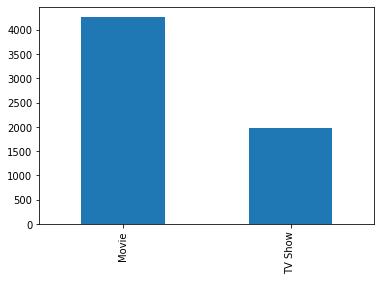

In [20]:
# (a) By Show Type 
raw_data['type'].value_counts().plot('bar')

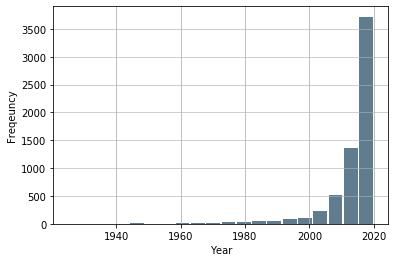

In [21]:
# (a) By Release Year

size, scale = 1000, 10
raw_data['release_year'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('Year')
plt.ylabel('Freqeuncy')
plt.grid(axis='y', alpha=0.75)

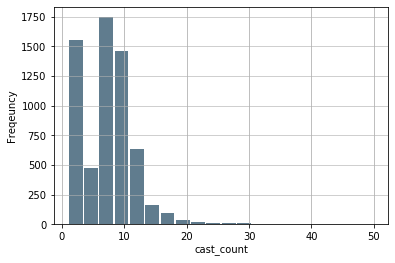

In [22]:
# (a) By cast_count

size, scale = 1000, 10
raw_data['cast_count'].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('cast_count')
plt.ylabel('Freqeuncy')
plt.grid(axis='y', alpha=0.75)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


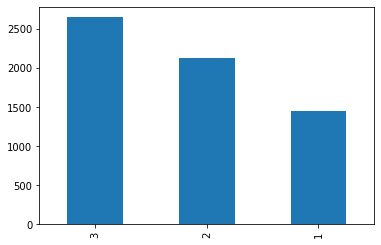

In [23]:
# (a) By listed_count
raw_data['listed_count'].value_counts().plot('bar')

## IV. Specific Data Analysis by Show Type

In [24]:
# Separate to Movie Dataframe and TV_Show Dataframe 
movie_data = raw_data[raw_data.type == 'Movie']
tv_data = raw_data[raw_data.type == 'TV Show']

In [25]:
# Next lets zoom in to analysis for Movie and TV shows separately 
# 1. What are the common keywords in the title and description for Movie and TV shows separately? 

In [26]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4265 entries, 0 to 6231
Data columns (total 14 columns):
show_id          4265 non-null int64
type             4265 non-null object
title            4265 non-null object
cast             4265 non-null object
country          4265 non-null object
release_year     4265 non-null int64
rating           4265 non-null object
duration         4265 non-null object
listed_in        4265 non-null object
description      4265 non-null object
duration_unit    4265 non-null object
country_final    4265 non-null object
cast_count       4265 non-null int64
listed_count     4265 non-null int64
dtypes: int64(4), object(10)
memory usage: 499.8+ KB


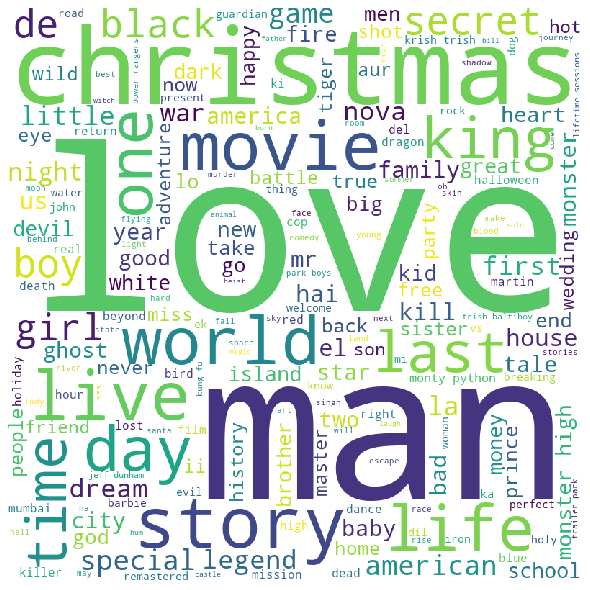

In [27]:
# Plotting the word cloud for distribution of title for movie data

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in movie_data.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

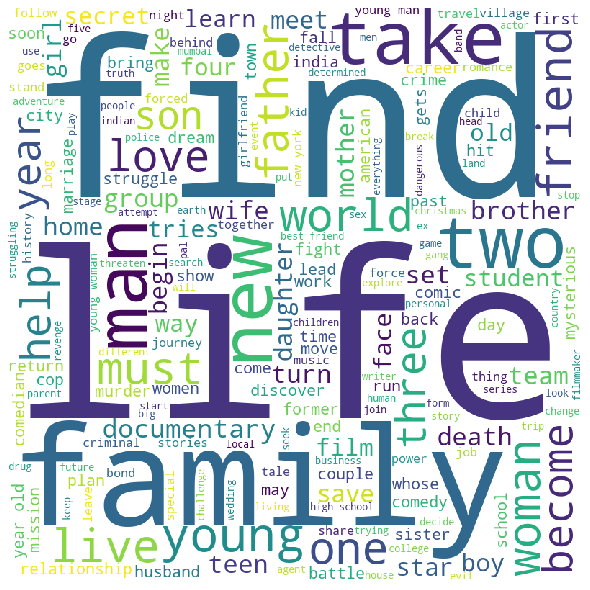

In [28]:
# Plotting the word cloud for distribution of description for movie data

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in movie_data.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

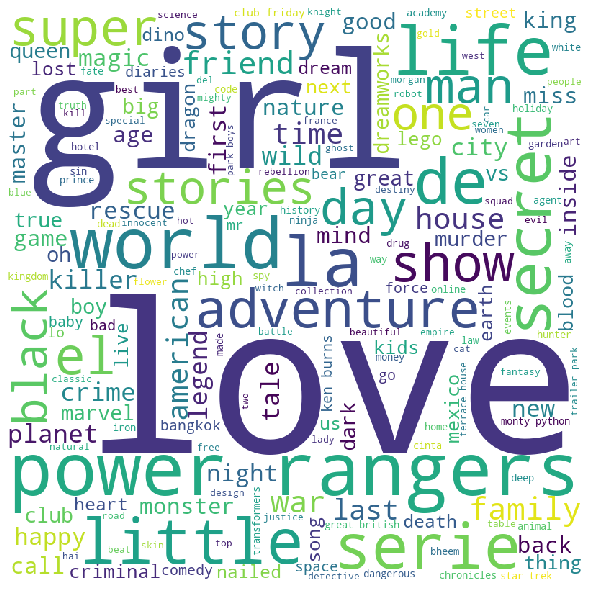

In [29]:
# Plotting the word cloud for distribution of title for tv show data

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tv_data.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

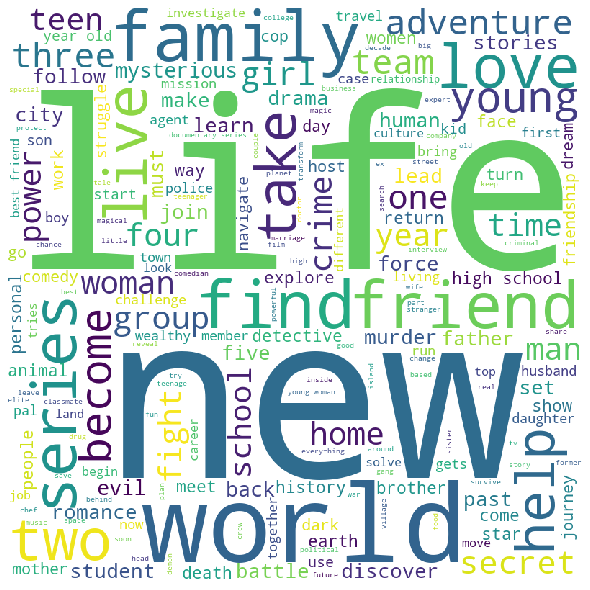

In [30]:
# Plotting the word cloud for distribution of description for tv show data

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tv_data.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

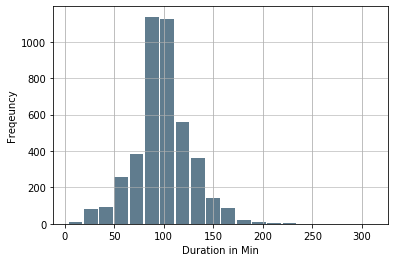

In [31]:
# 2. What are the duration for Movie and TV shows separately? 

# Note that Movie shows runs in min while TV shows runs in seasons 

# Duration Distribution for Movie 
size, scale = 1000, 10
movie_data['duration'].astype(int).plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('Duration in Min')
plt.ylabel('Freqeuncy')
plt.grid(axis='y', alpha=0.75)

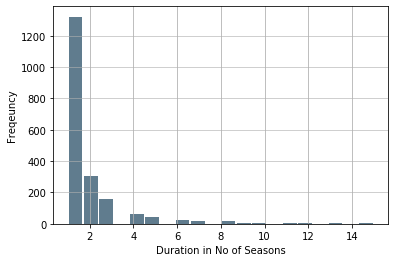

In [32]:
# Duration Distribution for TV Shows in Season
size, scale = 1000, 10
tv_data['duration'].astype(int).plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('Duration in No of Seasons')
plt.ylabel('Freqeuncy')
plt.grid(axis='y', alpha=0.75)

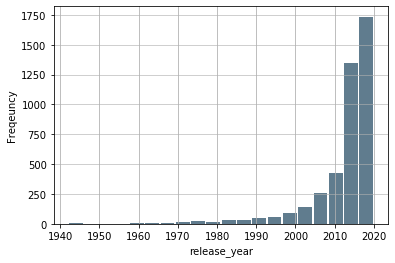

In [33]:
# 3. How outdated are the movies or TV shows? 

# Release Year Distribution for Movie 
size, scale = 1000, 10
movie_data['release_year'].astype(int).plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('release_year')
plt.ylabel('Freqeuncy')
plt.grid(axis='y', alpha=0.75)


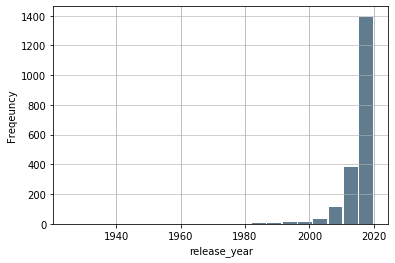

In [34]:
# Release Year Distribution for TV Shows
size, scale = 1000, 10
tv_data['release_year'].astype(int).plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.xlabel('release_year')
plt.ylabel('Freqeuncy')
plt.grid(axis='y', alpha=0.75)


In [35]:
# 4. Where are the movies and TV shows based on the origin country for release? 

# (a) Movie Origin Distribution
movie_data['country_final'].value_counts()

United States           1482
multi_countries          738
India                    724
Unknown                  195
United Kingdom           170
Canada                    88
Spain                     80
Turkey                    55
Mexico                    54
France                    50
Hong Kong                 49
Japan                     47
Indonesia                 43
Philippines               43
Egypt                     42
Nigeria                   36
Brazil                    35
Germany                   33
Thailand                  33
Australia                 32
South Korea               32
Argentina                 26
China                     19
Italy                     17
Pakistan                  14
Malaysia                  11
Netherlands               10
Colombia                   9
Poland                     9
Chile                      9
Ireland                    7
New Zealand                6
Israel                     5
Singapore                  5
Denmark       

In [36]:
# (b) TV Origin Distribution
tv_data['country_final'].value_counts()

United States           550
Unknown                 281
multi_countries         185
United Kingdom          178
Japan                   129
South Korea             104
Taiwan                   65
India                    53
Canada                   53
France                   40
Australia                39
Spain                    37
China                    31
Mexico                   29
Turkey                   24
Thailand                 17
Colombia                 16
Brazil                   15
Argentina                12
Russia                   12
Singapore                 9
Israel                    8
Egypt                     8
Germany                   7
Denmark                   7
Malaysia                  6
Belgium                   5
Lebanon                   5
Sweden                    5
Italy                     5
Norway                    5
Pakistan                  4
Ireland                   4
Chile                     3
Poland                    3
Hong Kong           

In [37]:
# 4. How are the movies and TV shows rated? 

# (a) Movie Rating Distribution
movie_data['rating'].value_counts()

TV-MA       1348
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
Unknown        8
UR             7
NC-17          2
Name: rating, dtype: int64

In [38]:
# (b) TV Shows Rating Distribution
tv_data['rating'].value_counts()

TV-MA       679
TV-14       660
TV-PG       269
TV-Y        102
TV-Y7       100
TV-G         69
TV-Y7-FV     68
NR           16
R             2
Unknown       2
PG            1
G             1
Name: rating, dtype: int64